# Author : Devrishi Goswami

## Task 1: Prediction using Supervised Machine Learning

## GRIP@TheSparksFoundation

### In this task i have to predict the percentage of an student based on the number of study hours.
### This is a simple linear regression task as its involves just 2 variables 


In [1]:
#Importing numpy and pandas
import numpy as np
import pandas as pd

In [2]:
#Storing data from the given link
df= pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
#Reading the data by using head() which show top 5 values
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Checking datatypes
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [5]:
#For Statistical summary
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualizing stored data

In [6]:
#importing matplot libraries for visual representation of the data
import matplotlib.pyplot as plt
%matplotlib inline

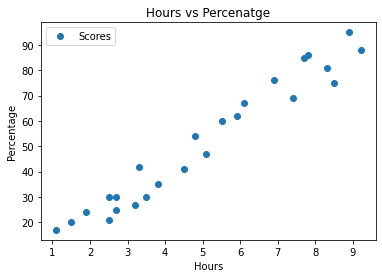

In [7]:
#plotting coordinated of x and y axis
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percenatge')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

Above graph shows there is a positive linear regression between the number of hours studied vs percentage

Dividing data into predictors and predicted 

In [8]:
#iloc() used for selecting particular values from rows and column 
X = df.iloc[:,:-1]
Y = df.iloc[:,1]

In [9]:
print("Values of X \n",X)

Values of X 
     Hours
0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8


In [10]:
print("Values of Y \n",Y)

Values of Y 
 0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


## Model Training

Splitting data into training and testing sets

In [11]:
#importing test_train library from sklearn
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr=LinearRegression()

In [15]:
lr.fit(X_train,Y_train)

LinearRegression()

In [16]:
print("Interception Value(b0)",lr.intercept_,
"Coeffecient Value(b1)",lr.coef_)

Interception Value(b0) 2.018160041434683 Coeffecient Value(b1) [9.91065648]


## Plotting Line of Regression

In [17]:
yhat= lr.coef_*X+lr.intercept_

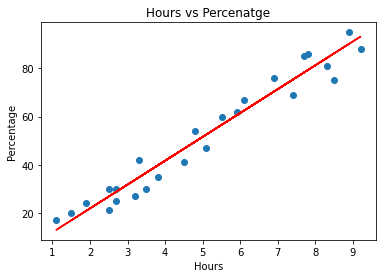

In [18]:
plt.scatter(X,Y)
plt.plot(X,yhat,c='red')
plt.title("Hours vs Percenatge")
plt.xlabel("Hours")
plt.ylabel("Percentage")
plt.show()

## Testing our model by making some prediction

In [19]:
y_pred= lr.predict(X_test)

In [20]:
#predicted values
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [21]:
#orginal values
Y_test

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

In [22]:
diff =pd.DataFrame({'Actual Values':Y_test,'Predicted Values':y_pred})

In [23]:
diff

,Actual Values,Predicted Values
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [24]:
#Estimating training and test score
print("Training Score:",lr.score(X_train,Y_train))
print("Test Score:", lr.score(X_test,Y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


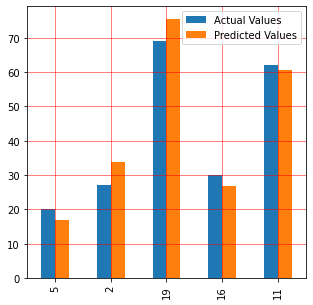

In [26]:
#Graphical visualization of both the values 
diff.plot(kind='bar',figsize=(5,5))
plt.grid(which='major',linewidth='0.5',color='red')
plt.grid(which='minor',linewidth='0.5',color='blue')
plt.show()

In [27]:
#testing our model with given data
hours=9.25
test =np.array([hours])

In [28]:
test=test.reshape(-1,1)
ml =lr.predict(test)

In [30]:
print("Predicted Score = {}".format(ml[0]))

Predicted Score = 93.69173248737538


## Evaluating the model

In [31]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))
print('R^2:',metrics.r2_score(Y_test,y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error 4.6474476121003665
R^2: 0.9454906892105356


R^2 gives the score of model fit and in this case we have R-2 = 0.9454906892105355 which is actually a great score for this model.